In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
start = dt.datetime(2000,1,1)
end = dt.datetime.now()
df = yf.download(["AAPL","GOOG","AMZN","META","MSFT","NVDA","TSLA"], start, end)
log_returns = np.log(1+df["Close"].pct_change()).dropna()
log_returns

C:\Users\HP\AppData\Local\Temp\ipykernel_2724\2494577540.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(["AAPL","GOOG","AMZN","META","MSFT","NVDA","TSLA"], start, end)
[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOG,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-05-21,0.056626,0.019725,0.022578,-0.116378,0.016267,0.017235,0.042968
2012-05-22,-0.007709,-0.012828,-0.021912,-0.093255,0.000336,-0.012280,0.068181
2012-05-23,0.024107,0.009015,0.014311,0.031749,-0.022083,0.024411,0.007118
2012-05-24,-0.009226,-0.009433,-0.009562,0.031680,-0.001375,-0.026885,-0.024145
2012-05-25,-0.005375,-0.010978,-0.020299,-0.034497,-0.000344,0.023664,-0.015644
...,...,...,...,...,...,...,...
2025-08-25,-0.002638,-0.003941,0.011734,-0.001976,-0.005873,0.010173,0.019196
2025-08-26,0.009420,0.003372,-0.005802,0.001061,-0.004412,0.010841,0.014522
2025-08-27,0.005133,0.001791,0.001250,-0.008951,0.009318,-0.000936,-0.005904


In [3]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

In [4]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [5]:
def weightscreater(log_returns):
    rand = np.random.random(len(log_returns.columns))
    rand /= rand.sum()
    return rand

In [6]:
weightscreater(log_returns)

array([0.07387874, 0.18971283, 0.0451812 , 0.22256633, 0.06559013,
       0.20331422, 0.19975654])

In [7]:
cov_matrix = log_returns.cov()

In [8]:
returns = []
stds = []
w = []

for i in range(500):
    weights = weightscreater(log_returns)
    returns.append(expected_return(weights, log_returns))
    stds.append(standard_deviation(weights, cov_matrix))
    w.append(weights)

In [9]:
returns[stds.index(min(stds))]

np.float64(0.0009030589266728477)

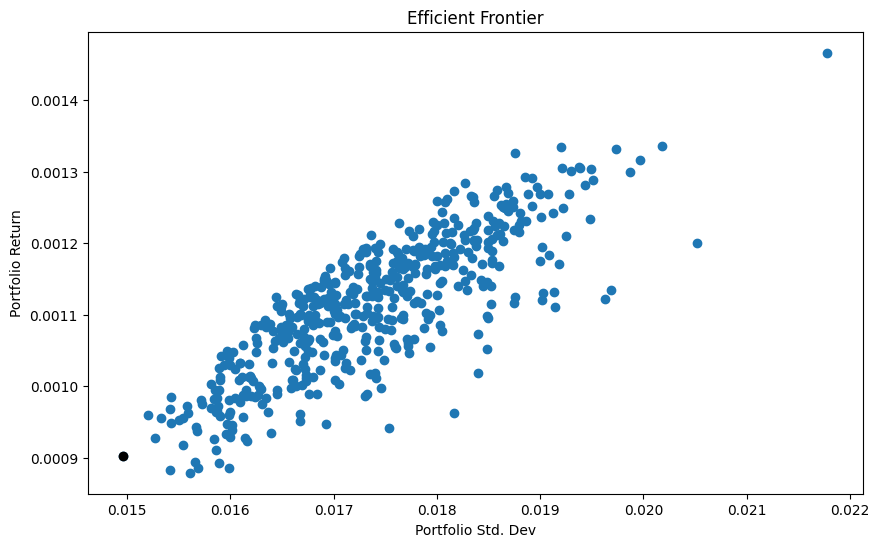

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(stds, returns)
plt.scatter(min(stds), returns[stds.index(min(stds))], c="black")
plt.title("Efficient Frontier")
plt.xlabel("Portfolio Std. Dev")
plt.ylabel("Portfolio Return")
plt.show()

In [11]:
# Efficient frontier line for above scatter plot.

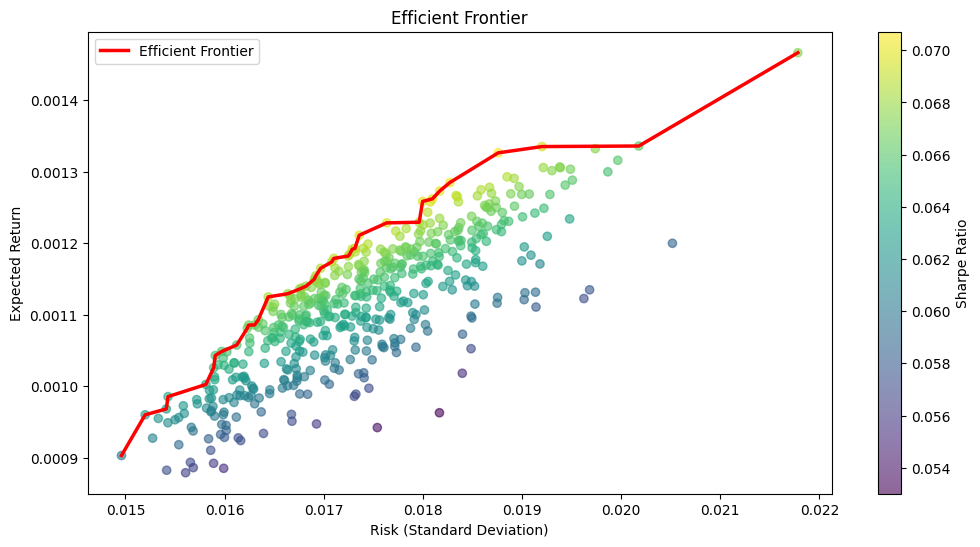

In [12]:
returns = np.array(returns)
stds = np.array(stds)

# Scatter plot of all portfolios
plt.figure(figsize=(12, 6))
plt.scatter(stds, returns, c=returns/stds, cmap='viridis', alpha=0.6)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

# Step 1: Sort portfolios by risk (stds)
sorted_indices = np.argsort(stds)
sorted_stds = stds[sorted_indices]
sorted_returns = returns[sorted_indices]

# Step 2: Filter for efficient frontier (monotonically increasing return)
efficient_stds = []
efficient_returns = []
max_return = -np.inf

for s, r in zip(sorted_stds, sorted_returns):
    if r > max_return:
        efficient_stds.append(s)
        efficient_returns.append(r)
        max_return = r

# Step 3: Plot the efficient frontier
plt.plot(efficient_stds, efficient_returns, color='red', linewidth=2.5, label='Efficient Frontier')
plt.legend()

plt.show()
